In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [2]:
os.chdir('D:/DS/Kaggle')

In [3]:
# Load data
pageviews = pd.read_csv('./pageviews.csv')
content_category = pd.read_csv('./CONTENT_CATEGORY.csv')
content_category_bottom = pd.read_csv('./CONTENT_CATEGORY_BOTTOM.csv')
content_category_top = pd.read_csv('./CONTENT_CATEGORY_TOP.csv')
device_data = pd.read_csv('./device_data.csv')
page = pd.read_csv('./PAGE.csv')
site_id = pd.read_csv('./SITE_ID.csv')
conversiones = pd.read_csv('./conversiones.csv', dtype={'mes' : 'object', 'anio' : 'object', 'USER_ID' : 'object'})

###  Procesamiento archivo conversiones

Elimino el '.0' de los datos de conversiones

In [4]:
conversiones['mes'] = pd.to_numeric(conversiones['mes'].str.replace('\.0', ''))
conversiones['anio'] = pd.to_numeric(conversiones['anio'].str.replace('\.0', ''))
conversiones['USER_ID'] = pd.to_numeric(conversiones['USER_ID'].str.replace('\.0', ''))
conversiones['conversion'] = 1
conversiones.head()

,mes,anio,USER_ID,conversion
0,7,2018,1410,1
1,8,2018,10755,1
2,8,2018,8270,1
3,10,2018,7558,1
4,9,2018,10731,1


### Procesamiento archivo pageviews

Crear columnas anio y mes

In [5]:
pageviews['USER_ID'] = pd.to_numeric(pageviews['USER_ID'])
# Me quedo con los primeros 100 usuarios para hacer pruebas
# usuarios = pd.DataFrame(pageviews['USER_ID'].unique(), columns=['USER_ID'])
# usuarios = usuarios.head(100)
# usuarios
# pageviews = pd.merge(usuarios, pageviews, how='inner')
# pageviews['USER_ID'].nunique()

# Creo campos para hacer el join con el archivo conversiones
pageviews['FEC_EVENT'] = pd.to_datetime(pageviews['FEC_EVENT'])
pageviews['anio'] = pageviews['FEC_EVENT'].dt.year
pageviews['mes'] = pageviews['FEC_EVENT'].dt.month
pageviews.head()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID,anio,mes
0,2018-03-30 07:35:48,1,1,1,1,1,1,0,2018,3
1,2018-03-30 07:35:52,2,2,2,2,2,1,0,2018,3
2,2018-03-30 07:36:11,3,2,2,2,3,1,0,2018,3
3,2018-03-30 07:36:16,4,2,2,2,3,1,0,2018,3
4,2018-03-30 07:41:38,5,2,2,2,2,1,0,2018,3


### Merge datasets pageviews y conversiones
Hago un join y lleno con 0 en los casos que no hubo conversion

In [6]:
data = pd.merge(pageviews, conversiones, how='left', left_on = ['mes','anio','USER_ID'], right_on = ['mes','anio','USER_ID'])
data['conversion'] = data['conversion'] .replace(np.nan, 0)
data.head()

,FEC_EVENT,PAGE,CONTENT_CATEGORY,CONTENT_CATEGORY_TOP,CONTENT_CATEGORY_BOTTOM,SITE_ID,ON_SITE_SEARCH_TERM,USER_ID,anio,mes,conversion
0,2018-03-30 07:35:48,1,1,1,1,1,1,0,2018,3,0.0
1,2018-03-30 07:35:52,2,2,2,2,2,1,0,2018,3,0.0
2,2018-03-30 07:36:11,3,2,2,2,3,1,0,2018,3,0.0
3,2018-03-30 07:36:16,4,2,2,2,3,1,0,2018,3,0.0
4,2018-03-30 07:41:38,5,2,2,2,2,1,0,2018,3,0.0


### Merge con el resto de los datasets para agregar las descripciones

In [7]:
data = pd.merge(data, page, how='inner')
data.head()

# data = pd.merge(data, content_category, how='inner')
# data = pd.merge(data, content_category_top, how='inner')
# data = pd.merge(data, content_category_bottom, how='inner')
# data = pd.merge(data, site_id, how='inner')
# print(data.head())

            FEC_EVENT  PAGE  CONTENT_CATEGORY  CONTENT_CATEGORY_TOP  \
0 2018-03-30 07:35:48     1                 1                     1   
1 2018-02-18 13:26:45     1                 1                     1   
2 2018-03-04 18:04:12     1                 1                     1   
3 2018-01-04 08:29:59     1                 1                     1   
4 2018-01-04 08:52:16     1                 1                     1   

   CONTENT_CATEGORY_BOTTOM  SITE_ID  ON_SITE_SEARCH_TERM  USER_ID  anio  mes  \
0                        1        1                    1        0  2018    3   
1                        1        1                    1        0  2018    2   
2                        1        1                    1        0  2018    3   
3                        1        1                    1        0  2018    1   
4                        1        1                    1        0  2018    1   

   conversion PAGE_descripcion CONTENT_CATEGORY_descripcion  \
0         0.0    WEB : EMINEN

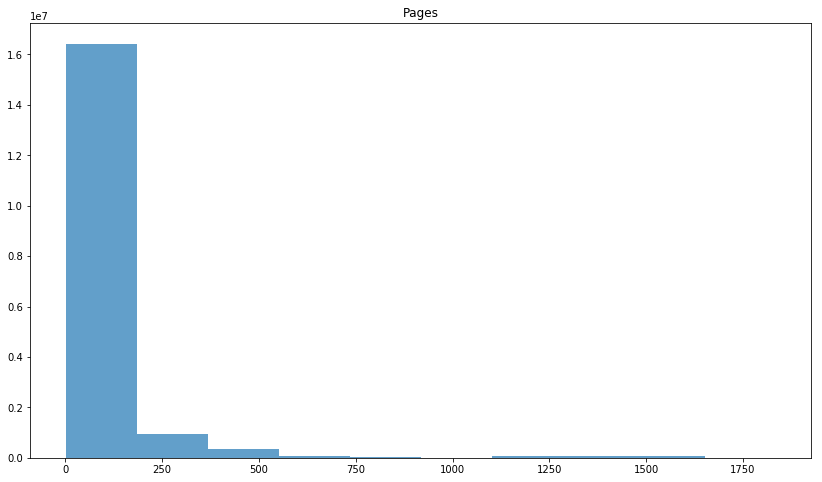

In [8]:
plt.figure(figsize=(14,8))
_, bins, _ = plt.hist(data['PAGE'], alpha=0.7)
plt.title('Pages')
plt.show()

In [9]:
data['PAGE_descripcion'].value_counts()

/LOGIN                                                   2943632
/INICIO                                                  2847173
/PAGOS/INICIO                                             724517
/TARJETAS/INICIO                                          671436
/ERROR/SESIONEXPIRADA                                     662695
WEB : PERSONAS                                            644244
/CUENTAS/MIS-CUENTAS                                      528158
/CUENTAS/INICIO                                           502875
/TRANSFERENCIAS/INICIO                                    447984
/TARJETAS/CONSUMOS/0                                      411057
HB : MASIVO : CONSULTAS : RESUMEN DE PRODUCTOS : HOME     390783
/INVERSIONES/INICIO                                       390677
HB : EMINENT : CONSULTAS : RESUMEN DE PRODUCTOS : HOM     316911
HB : MASIVO : LOGIN                                       261701
WEB : EMINENT                                             258438
/ERROR/ERRORIN           

### Sesiones por usuario

In [ ]:
# Definimos un límite de tiempo entre eventos (Cuánto tiempo pasa hasta que expira la sesión?)
T = timedelta(seconds=30*60)

# data = data.loc[:,['USER_ID', 'FEC_EVENT', 'anio', 'mes']]
# Ordenamos el dataset por usuario y fecha de evento
data = data.sort_values(by=['USER_ID','FEC_EVENT'])

# Agregamos una columna con la fecha de evento anterior
data['last_date'] = data.groupby(['USER_ID'])['FEC_EVENT'].shift()

# Crear flag de nueva sesión cada vez que hay un nuevo ingreso
data['new_session'] = (((data['FEC_EVENT']
                            - data['last_date'])>=T) | (data['last_date'].isnull())).astype(int)
data['inc'] = data.groupby('USER_ID')['new_session'].cumsum()

# Creamos el id de sesión
data['session_id'] = data['USER_ID'].astype(str) + '_' + data['inc'].astype(str)
data = data.drop('inc', axis=1)

print(data.head(10))

In [ ]:
sessions = data.groupby(['session_id', 'USER_ID']).agg({'FEC_EVENT':['min','max','count'], 'conversion':'sum'})
sessions.columns = sessions.columns.droplevel()
# sessions.columns = ['event count','min timestamp','max timestamp','unique skus']
# sessions.columns = sessions.columns.astype('object')
sessions = sessions.reset_index()
print(sessions['session_id'].nunique())
sessions.loc[sessions['sum'] > 0].head()

In [ ]:
data.loc[data['new_session']==1,['USER_ID', 'FEC_EVENT', 'PAGE']]['PAGE'].value_counts()